# Talbot et al. memory code

Adopted from <https://github.com/ColmTalbot/gwmemory/tree/master/examples>

## Effect of HoM

### NRSur7dq4

In [1]:
%pylab inline
%config Inline.Backend.figure_format = 'retina'

import gwmemory

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work
Loaded NRSur7dq4 model
Loaded NRSur7dq4 model
Loaded NRSur7dq4 model
Loaded NRSur7dq4 model
Loaded NRSur7dq4 model
Loaded NRSur7dq4 model
Loaded NRSur7dq4 model
Loaded NRSur7dq4 model


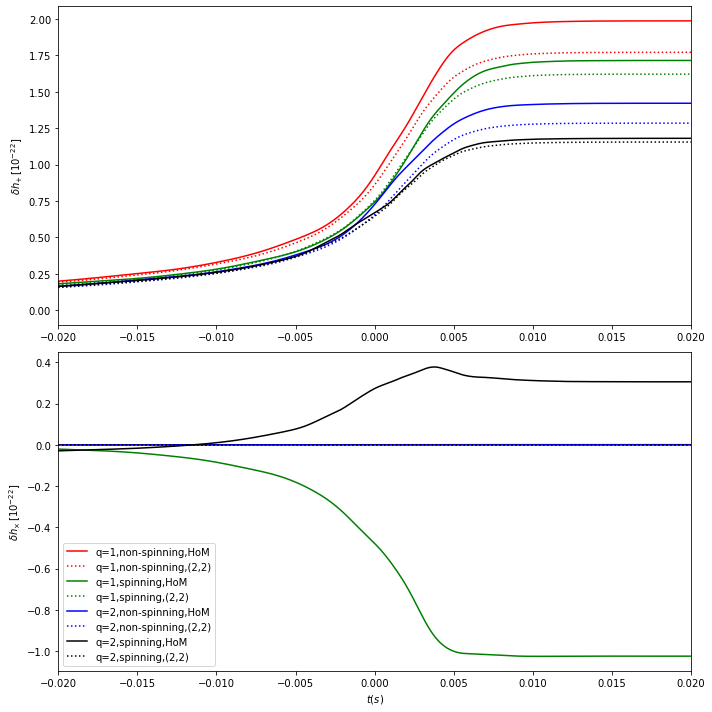

In [2]:
fig = figure(figsize=(10, 10))

qs = [1., 2.]
S1s = [[0., 0., 0.], [0.8, 0., 0.]]
S2s = [[0., 0., 0.], [0., 0.8, 0.]]

colours = ['r', 'b', 'g', 'k']

times = np.linspace(-0.08, 0.02, 10001)

lbl_q = ['q=1','q=2']
lbl_s = ['non-spinning','spinning']

ax = [fig.add_subplot(2, 1, 1), fig.add_subplot(2, 1, 2)]

for ii, q in enumerate(qs):
    for jj, (S1, S2) in  enumerate(zip(S1s, S2s)):
    
        h_mem, times = gwmemory.time_domain_memory(q=q, spin_1=S1, spin_2=S2, total_mass=60., distance=400.,
                                                   model='NRSur7dq4', inc=np.pi/2, pol=0, times=times, phase=0., 
                                                   modes=[(2, -2), (2,-1), (2,0), (2,1), (2,2), (3,-3), (3,-2), (3,-1), (3,0), (3,1), (3,2), (3,3), (4,-4), (4,-3), (4,-2), (4,-1), (4,0), (4,1), (4,2), (4,3), (4,4)])
        
        
        ax[0].plot(times, h_mem['plus'] * 1e22, linestyle='-', color=colours[ii + jj * 2],label=','.join([lbl_q[ii],lbl_s[jj],'HoM']))
        ax[1].plot(times, h_mem['cross'] * 1e22, linestyle='-', color=colours[ii + jj * 2],label=','.join([lbl_q[ii],lbl_s[jj],'HoM']))

        h_mem, times = gwmemory.time_domain_memory(q=q, spin_1=S1, spin_2=S2, total_mass=60., distance=400.,
                                                   model='NRSur7dq4', inc=np.pi/2, pol=0, #Lmax=2,
                                                   modes=[(2, 2), (2, -2)], times=times, phase=0.)

        ax[0].plot(times, h_mem['plus'] * 1e22, linestyle=':', color=colours[ii + jj * 2],label=','.join([lbl_q[ii],lbl_s[jj],'(2,2)']))
        ax[1].plot(times, h_mem['cross'] * 1e22, linestyle=':', color=colours[ii + jj * 2],label=','.join([lbl_q[ii],lbl_s[jj],'(2,2)']))

xlabel('$t (s)$')
ax[0].set_ylabel('$\delta h_{+} \, \left[10^{-22}\\right]$')
ax[1].set_ylabel('$\delta h_{\\times} \, \left[10^{-22}\\right]$')
# ax[0].legend(loc='upper left', fontsize=20)

ax[0].set_xlim(-0.02, 0.02)
ax[1].set_xlim(-0.02, 0.02)

legend()
tight_layout()

### NRSur7dq2

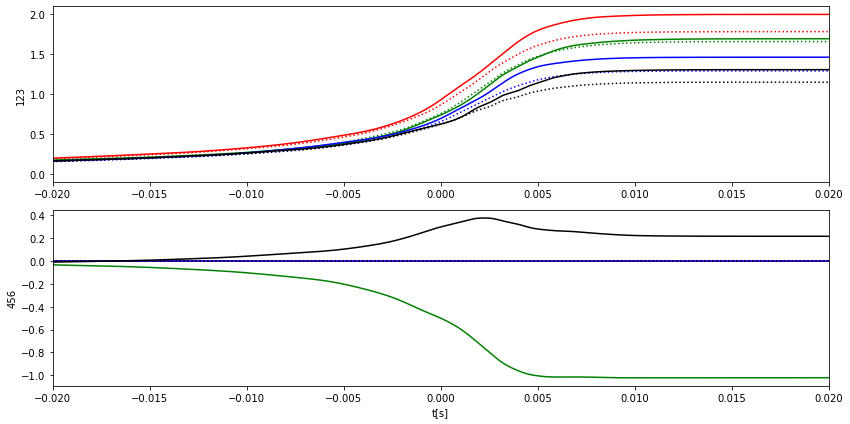

In [3]:
fig = figure(figsize=(12, 6))

qs = [1.0, 2.0]
S1s = [[0.0, 0.0, 0.0], [0.8, 0.0, 0.0]]
S2s = [[0.0, 0.0, 0.0], [0.0, 0.8, 0.0]]

colours = ["r", "b", "g", "k"]

times = np.linspace(-0.08, 0.02, 10001)

labels = ["Equal-mass, non-spinning"]

ax = [fig.add_subplot(2, 1, 1), fig.add_subplot(2, 1, 2)]

parameters = dict(
    total_mass=60, distance=400, model="NRSur7dq2", inc=np.pi / 2, phase=0, times=times
)

for ii, q in enumerate(qs):
    parameters["q"] = q
    for jj, (S1, S2) in enumerate(zip(S1s, S2s)):
        colour = colours[ii + jj * 2]

        parameters["spin_1"] = S1
        parameters["spin_2"] = S2

        h_mem, times = gwmemory.time_domain_memory(**parameters)

        ax[0].plot(times, h_mem["plus"] * 1e22, linestyle="-", color=colour)
        ax[1].plot(times, h_mem["cross"] * 1e22, linestyle="-", color=colour)

        h_mem, times = gwmemory.time_domain_memory(
            **parameters, Lmax=2, modes=[(2, 2), (2, -2)]
        )

        ax[0].plot(times, h_mem["plus"] * 1e22, linestyle=":", color=colour)
        ax[1].plot(times, h_mem["cross"] * 1e22, linestyle=":", color=colour)

xlabel("t[s]")
ax[0].set_ylabel("123")
ax[1].set_ylabel("456")

ax[0].set_xlim(-0.02, 0.02)
ax[1].set_xlim(-0.02, 0.02)

tight_layout()

## Oscillatory Mode Dependance

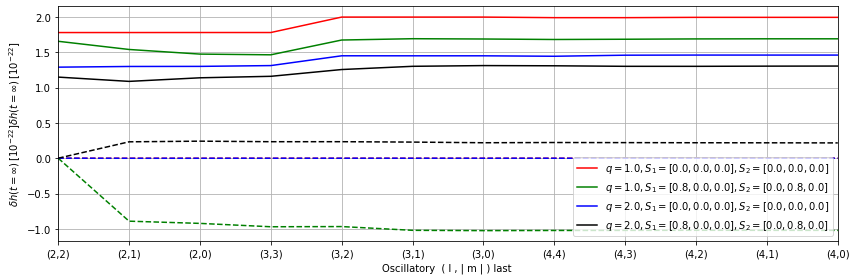

In [4]:
qs = [1.0, 2.0]
S1s = [[0.0, 0.0, 0.0], [0.8, 0.0, 0.0]]
S2s = [[0.0, 0.0, 0.0], [0.0, 0.8, 0.0]]

colours = ["r", "b", "g", "k"]

mems_plus = {}
mems_cross = {}

times = np.linspace(-0.08, 0.02, 10001)

parameters = dict(total_mass=60, distance=400, times=times)

for ii, q in enumerate(qs):
    parameters["q"] = q
    for jj, (S1, S2) in enumerate(zip(S1s, S2s)):
        parameters["spin_1"] = S1
        parameters["spin_2"] = S2

        surr = gwmemory.waveforms.Surrogate(**parameters)

        hmem = {}

        modes = []
        for l in range(2, 5):
            for m in np.flipud(range(0, l + 1)):
                modes += list(set([(l, m), (l, -m)]))
                hmem[f"{l}{m}"], times = surr.time_domain_memory(
                    inc=np.pi / 2, phase=0, modes=modes
                )

        max_h_mem_plus = []
        max_h_mem_cross = []
        keys = []
        for l in range(2, 5):
            for m in np.flipud(range(0, l + 1)):
                keys.append(f"{l}{m}")
                max_h_mem_plus.append(hmem[f"{l}{m}"]["plus"][-1])
                max_h_mem_cross.append(hmem[f"{l}{m}"]["cross"][-1])

        mems_plus[f"{q}{S1}{S2}"] = np.array(max_h_mem_plus)
        mems_cross[f"{q}{S1}{S2}"] = np.array(max_h_mem_cross)

colours = ["r", "b", "g", "k"]

spin_keys = [f"{S1}{S2}" for S1, S2 in zip(S1s, S2s)]

fig = figure(figsize=(12, 4))

for ii, q in enumerate(qs):
    for jj, (S1, S2) in enumerate(zip(S1s, S2s)):

        key = f"{q}{S1}{S2}"
        max_h_mems_plus = mems_plus[key]
        max_h_mems_cross = mems_cross[key]

        plot(
            range(len(max_h_mems_plus)),
            max_h_mems_plus * 1e22,
            color=colours[ii + jj * 2],
            linestyle="-",
            label=f"$q={q} , S_1={S1} , S_2={S2}$",
        )
        plot(
            range(len(max_h_mems_cross)),
            max_h_mems_cross * 1e22,
            color=colours[ii + jj * 2],
            linestyle="--",
        )

xticks(range(len(max_h_mems_plus)))
keys = [f"({ell},{delta_m})" for ell, delta_m in keys]
ax = gca()
ax.set_xticklabels(keys)
xlim(0, len(max_h_mems_plus) - 1)
ax.grid(axis="both")

xlabel("Oscillatory  ( l , | m | ) last ")
ylabel("$\delta h(t=\infty) \, \left[10^{-22}\\right] \delta h(t=\infty) \, \left[10^{-22}\\right]$")
legend(loc="lower right")

tight_layout()

## Memory mode dependence

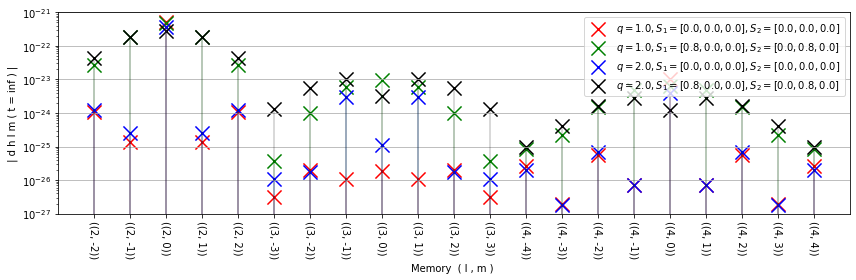

In [7]:
fig = figure(figsize=(12, 4))

qs = [1.0, 2.0]
S1s = [[0.0, 0.0, 0.0], [0.8, 0.0, 0.0]]
S2s = [[0.0, 0.0, 0.0], [0.0, 0.8, 0.0]]

colours = ["r", "b", "g", "k"]

times = np.linspace(-0.08, 0.02, 10001)

parameters = dict(total_mass=60, distance=400, times=times, model="NRSur7dq2")

for ii, q in enumerate(qs):
    parameters["q"] = q
    for jj, (S1, S2) in enumerate(zip(S1s, S2s)):
        parameters["spin_1"] = S1
        parameters["spin_2"] = S2

        h_mem, times = gwmemory.time_domain_memory(**parameters)

        colour = colours[ii + jj * 2]

        for ell, delta_m in h_mem:
            if ell <= 4:
                if ell == 2 and delta_m == 0:
                    scatter(
                        ell**2 + delta_m + ell,
                        abs(h_mem[(ell, delta_m)][-1]),
                        marker="x",
                        s=200,
                        color=colour,
                        label=f"$q={q} , S_1={S1} , S_2={S2}$",
                    )
                else:
                    scatter(
                        ell**2 + delta_m + ell,
                        abs(h_mem[(ell, delta_m)][-1]),
                        marker="x",
                        s=200,
                        color=colour,
                    )
                plot(
                    [ell**2 + delta_m + ell, ell**2 + delta_m + ell],
                    [0, abs(h_mem[(ell, delta_m)][-1])],
                    color=colour,
                    alpha=0.2,
                )

xlim(3, 5**2)
xticks(range(4, 5**2, 1), rotation=270)
keys = [f"({ell, delta_m})" for ell, delta_m in gwmemory.harmonics.lmax_modes(4)]
ax = gca()
ax.set_xticklabels(keys)
xlabel("Memory  ( l , m ) ")
ylim(1e-27, 1e-21)
yscale("log")
ylabel(" | d h l m ( t = inf ) | ")

ax = gca()
ax.set_yticks(np.logspace(-27, -21, 7))
ax.grid(axis="y")
legend()
tight_layout()


## Orientation Dependance

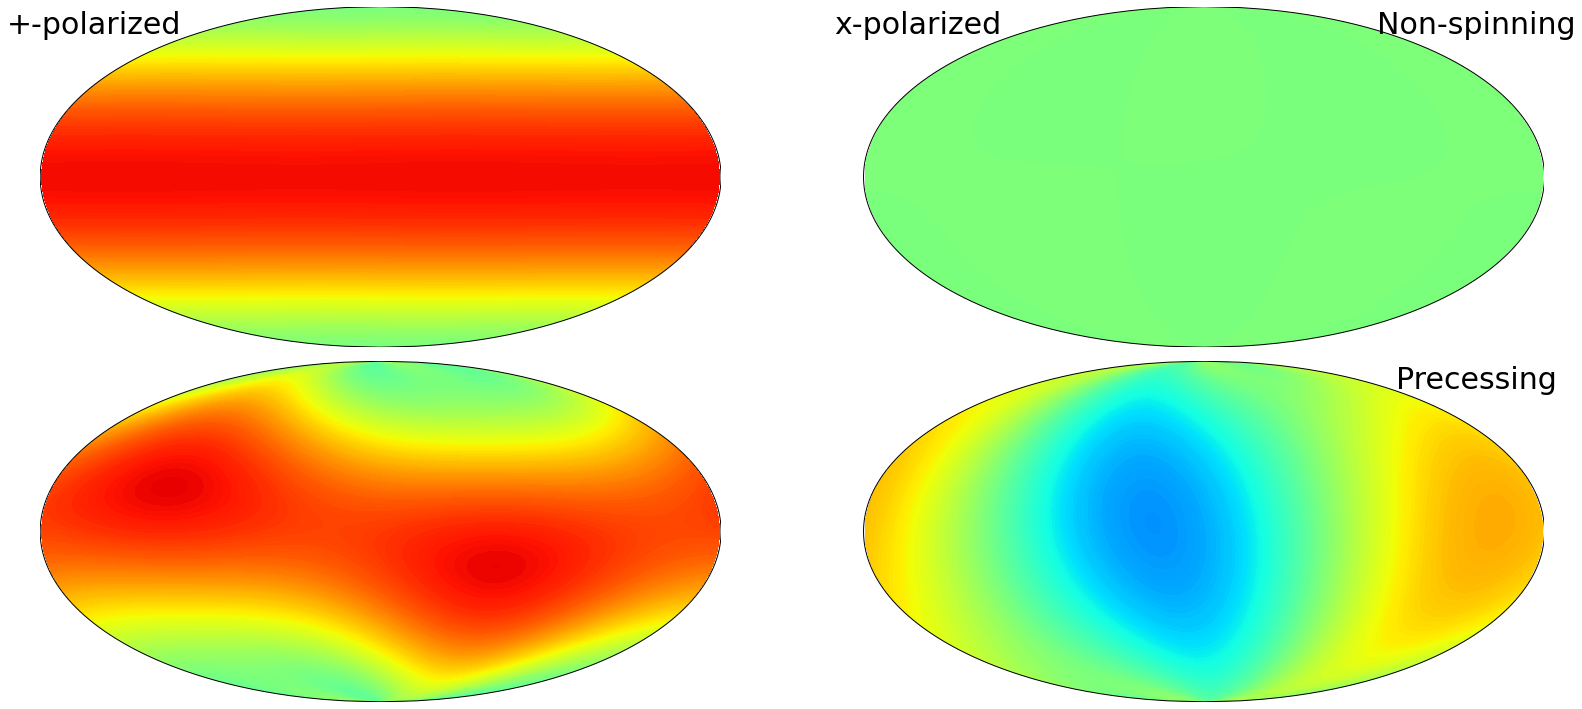

In [9]:
from mpl_toolkits.basemap import Basemap

fig = figure(figsize=(24, 10))

qs = [1.0]
S1s = [[0.0, 0.0, 0.0], [0.8, 0.0, 0.0]]
S2s = [[0.0, 0.0, 0.0], [0.0, 0.8, 0.0]]

labels = ["Non-spinning", "Precessing"]

parameters = dict(total_mass=60, distance=400, times=times, model="NRSur7dq2")

for ii, q in enumerate(qs):
    parameters["q"] = q
    for jj, (S1, S2) in enumerate(zip(S1s, S2s)):
        parameters["spin_1"] = S1
        parameters["spin_2"] = S2

        h_mem_lm, times = gwmemory.time_domain_memory(**parameters)

        inc_array = np.linspace(0, np.pi, 200) - np.pi / 2
        pol_array = np.linspace(0, 2 * np.pi, 200) - np.pi
        pols, incs = np.meshgrid(pol_array, inc_array)
        pols_deg = pols * 180 / np.pi
        incs_deg = incs * 180 / np.pi
        y_lm = {
            (ell, m): gwmemory.harmonics.sYlm(-2, ell, m, incs + np.pi / 2, pols)
            for ell, m in h_mem_lm.keys()
        }

        orientation_map = np.sum(
            [y_lm[key] * h_mem_lm[key][-1] for key in y_lm], axis=0
        )

        ax = subplot(2, 2, ii * 4 + jj * 2 + 1)
        m = Basemap(projection="moll", lon_0=-180, resolution="c")
        m.contourf(
            pols_deg,
            incs_deg,
            orientation_map.real,
            100,
            cmap=cm.jet,
            latlon=True,
            levels=np.linspace(-2.5e-22, 2.5e-22, 201),
        )

        if jj == 0:
            ax.annotate(
                text="+-polarized",
                xy=(0.08, 0.92),
                xycoords="axes fraction",
                fontsize=30,
                horizontalalignment="center",
            )

        ax = subplot(2, 2, ii * 4 + jj * 2 + 2)
        m = Basemap(projection="moll", lon_0=-180, resolution="c")
        m.contourf(
            pols_deg,
            incs_deg,
            orientation_map.imag,
            100,
            cmap=cm.jet,
            latlon=True,
            levels=np.linspace(-2.5e-22, 2.5e-22, 201),
        )
        if jj == 0:
            ax.annotate(
                text="x-polarized",
                xy=(0.08, 0.92),
                xycoords="axes fraction",
                fontsize=30,
                horizontalalignment="center",
            )
        ax.annotate(
            text=labels[jj],
            xy=(0.9, 0.92),
            xycoords="axes fraction",
            fontsize=30,
            horizontalalignment="center",
        )

tight_layout()

## Memory of memory

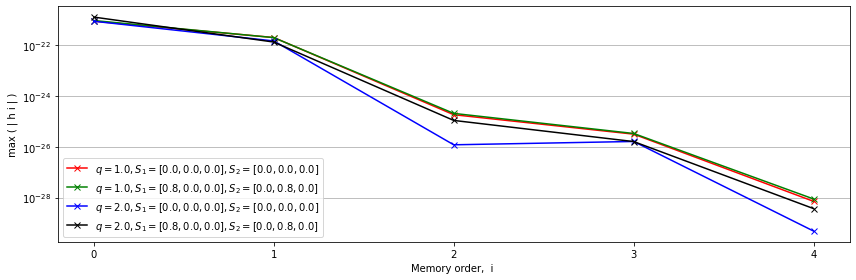

In [10]:
fig = figure(figsize=(12, 4))

qs = [1.0, 2.0]
S1s = [[0.0, 0.0, 0.0], [0.8, 0.0, 0.0]]
S2s = [[0.0, 0.0, 0.0], [0.0, 0.8, 0.0]]

colours = ["r", "b", "g", "k"]

times = np.linspace(-0.08, 0.02, 10001)

parameters = dict(total_mass=60, distance=400, times=times)

for ii, q in enumerate(qs):
    parameters["q"] = q
    for jj, (S1, S2) in enumerate(zip(S1s, S2s)):
        parameters["spin_1"] = S1
        parameters["spin_2"] = S2

        surr = gwmemory.waveforms.Surrogate(**parameters)
        osc = gwmemory.utils.combine_modes(surr.h_lm, np.pi / 2, 0)
        modes = gwmemory.harmonics.lmax_modes(4)
        old_h_mem = np.array(0 * (1 + 1j))
        delta_h = [max(abs(osc["plus"] - 1j * osc["cross"]))]

        for kk in range(1, 5):
            h_mem, times = surr.time_domain_memory(np.pi / 2, 0)
            delta_h.append(h_mem["plus"][-1] - 1j * h_mem["cross"][-1] - old_h_mem)
            old_h_mem = h_mem["plus"][-1] - 1j * h_mem["cross"][-1]
            h_mem_lm, times = surr.time_domain_memory()
            surr = gwmemory.waveforms.Surrogate(**parameters)
            for key in h_mem_lm:
                if key[0] <= 4:
                    surr.h_lm[key] += h_mem_lm[key]

        colour = colours[ii + jj * 2]

        semilogy(
            range(5),
            np.abs(delta_h),
            marker="x",
            label=f"$q={q} , S_1={S1} , S_2={S2}$",
            color=colour,
        )
        xlabel("Memory order,  i ")
        ylabel(" max ( | h i | ) ")
        
xticks(range(5))
legend(loc="lower left")

ax = gca()
ax.grid(True, axis="y")

tight_layout()

## Compare waveform models

/Users/boris.goncharov/opt/anaconda3/envs/gwmem_sxs/lib/python3.9/site-packages/gwmemory/waveforms/mwm.py:132: RuntimeWarning: invalid value encountered in power
  rr = rm * (1 - TT / trr) ** (1 / 4)
/Users/boris.goncharov/opt/anaconda3/envs/gwmem_sxs/lib/python3.9/site-packages/gwmemory/waveforms/mwm.py:150: ComplexWarning: Casting complex values to real discards the imaginary part
  h_MWM[post_merger] = 8 * np.pi * MM / rm + alt_sum_terms / (eta * MM)


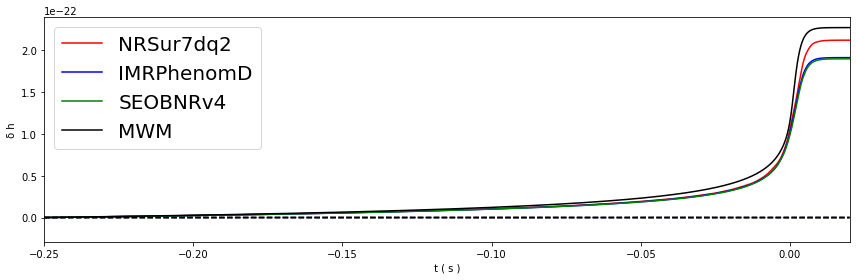

In [11]:
fig = figure(figsize=(12, 4))

q = 1.0
S1 = [0.0, 0.0, 0.0]
S2 = [0.0, 0.0, 0.0]

colours = ["r", "b", "g", "k"]

parameters = dict(
    q=1, spin_1=S1, spin_2=S2, total_mass=60, distance=400, inc=np.pi / 2, phase=0.0
)


for ii, model in enumerate(["NRSur7dq2", "IMRPhenomD", "SEOBNRv4", "MWM"]):
    h_mem, times = gwmemory.time_domain_memory(**parameters, model=model)

    plot(
        times,
        h_mem["plus"] - h_mem["plus"][np.argmin(abs(times + 0.25))],
        linestyle="-",
        color=colours[ii],
        label=model,
    )
    plot(
        times,
        h_mem["cross"] - h_mem["cross"][np.argmin(abs(times + 0.25))],
        linestyle="--",
        color=colours[ii],
    )

xlabel(" t ( s ) ")
ylabel(" δ h ")
legend(loc="upper left", fontsize=20)

xlim(-0.25, 0.02)

tight_layout()

## Oscillatory and Memory Waveform

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


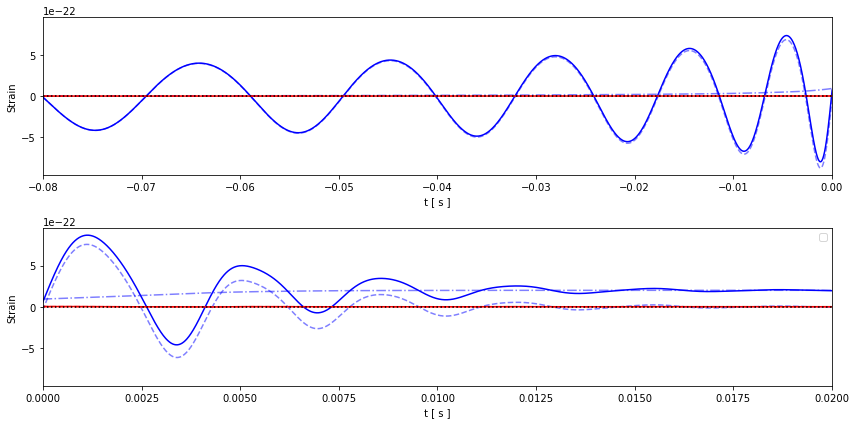

In [13]:
q = 1.0
S1 = [0.0, 0.0, 0.0]
S2 = [0.0, 0.0, 0.0]

times = np.linspace(-0.08, 0.02, 10001)
surr = gwmemory.waveforms.Surrogate(
    q=q, spin_1=S1, spin_2=S2, total_mass=60, distance=400, times=times
)

inc = np.pi / 2
pol = 0

oscillatory, times = surr.time_domain_oscillatory(inc=inc, phase=pol)
memory, times = surr.time_domain_memory(inc=inc, phase=pol)

fig = figure(figsize=(12, 6))
fig.add_subplot(2, 1, 1)
plot(times, oscillatory["plus"], linestyle="--", color="b", alpha=0.5)
plot(times, oscillatory["cross"], linestyle="--", color="r", alpha=0.5)
plot(times, memory["plus"], linestyle="-.", color="b", alpha=0.5)
plot(times, memory["cross"], linestyle="-.", color="r", alpha=0.5)
plot(times, oscillatory["plus"] + memory["plus"], color="b")
plot(times, oscillatory["cross"] + memory["cross"], color="r")
xlabel(" t [ s ] ")
ylabel("Strain")
axhline(0, linestyle=":", color="k")
xlim(-0.08, 0.0)

fig.add_subplot(2, 1, 2)
plot(times, oscillatory["plus"], linestyle="--", color="b", alpha=0.5)
plot(times, oscillatory["cross"], linestyle="--", color="r", alpha=0.5)
plot(times, memory["plus"], linestyle="-.", color="b", alpha=0.5)
plot(times, memory["cross"], linestyle="-.", color="r", alpha=0.5)
plot(times, oscillatory["plus"] + memory["plus"], color="b")
plot(times, oscillatory["cross"] + memory["cross"], color="r")
xlabel(" t [ s ] ")
ylabel("Strain")
axhline(0, linestyle=":", color="k")
xlim(-0.0, 0.02)

tight_layout()
legend()

## Frequency-domain memory

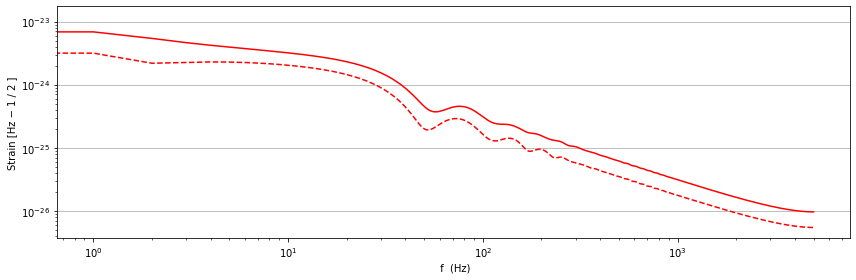

In [17]:
fig = figure(figsize=(12, 4))

q = 1.0
S1 = [0, 0.8, 0]
S2 = [0.8, 0, 0]

times = np.linspace(-0.98, 0.02, 10000)

colours = ["r", "b", "g", "k"]

h_mem, frequencies = gwmemory.frequency_domain_memory(
    q=q,
    spin_1=S1,
    spin_2=S2,
    total_mass=60.0,
    distance=400.0,
    model="NRSur7dq2",
    inc=np.pi / 2,
    phase=0.0,
    times=times,
)

loglog(frequencies, abs(h_mem["plus"]), linestyle="-", color="r", label=model)
loglog(frequencies, abs(h_mem["cross"]), linestyle="--", color="r")

xlabel(" f  (Hz)")
ylabel("Strain [Hz − 1 / 2 ]") 

#xlim(10, 2048)
#ylim(1e-27, 1e-23)

ax = gca()
ax.grid(True, axis="y")

tight_layout()

In [15]:
h_mem

{'plus': array([ 1.18735710e-23+0.00000000e+00j,  5.80693643e-24+3.68862529e-24j,
         4.41646358e-24+3.14517260e-24j, ...,
        -9.64111168e-27+6.05768036e-30j, -9.64111168e-27+3.02883987e-30j,
        -9.64111168e-27+0.00000000e+00j]),
 'cross': array([-5.40499956e-24+0.00000000e+00j, -2.46630294e-24-1.98549616e-24j,
        -2.00814186e-24-8.73308290e-25j, ...,
         5.45874018e-27-3.42983073e-30j,  5.45874018e-27-1.71491517e-30j,
         5.45874018e-27+0.00000000e+00j])}

## Comparison with SXS

In [18]:
import numpy as np
import gwsurrogate as gws
from gwmemory import time_domain_memory as tdm
from gwtools import sxs_memory

model = gws.LoadSurrogate("NRSur7dq4")
chi0 = [0, 0, 0.8]
t = np.arange(-1000, 100, 0.01)
t, h, dyn = model(2., chi0, chi0, times=t, f_low=0)

print("GWMemory time:")
%time h_mem, times = tdm(h_lm=h, times=t)
print("SXS time:")
%time h_mem_sxs, times_sxs = sxs_memory(h, t)

Loaded NRSur7dq4 model
GWMemory time:
CPU times: user 1.38 s, sys: 1.15 s, total: 2.53 s
Wall time: 2.53 s
SXS time:
CPU times: user 5.05 s, sys: 570 ms, total: 5.62 s
Wall time: 5.63 s


Comparison for real part of the strain

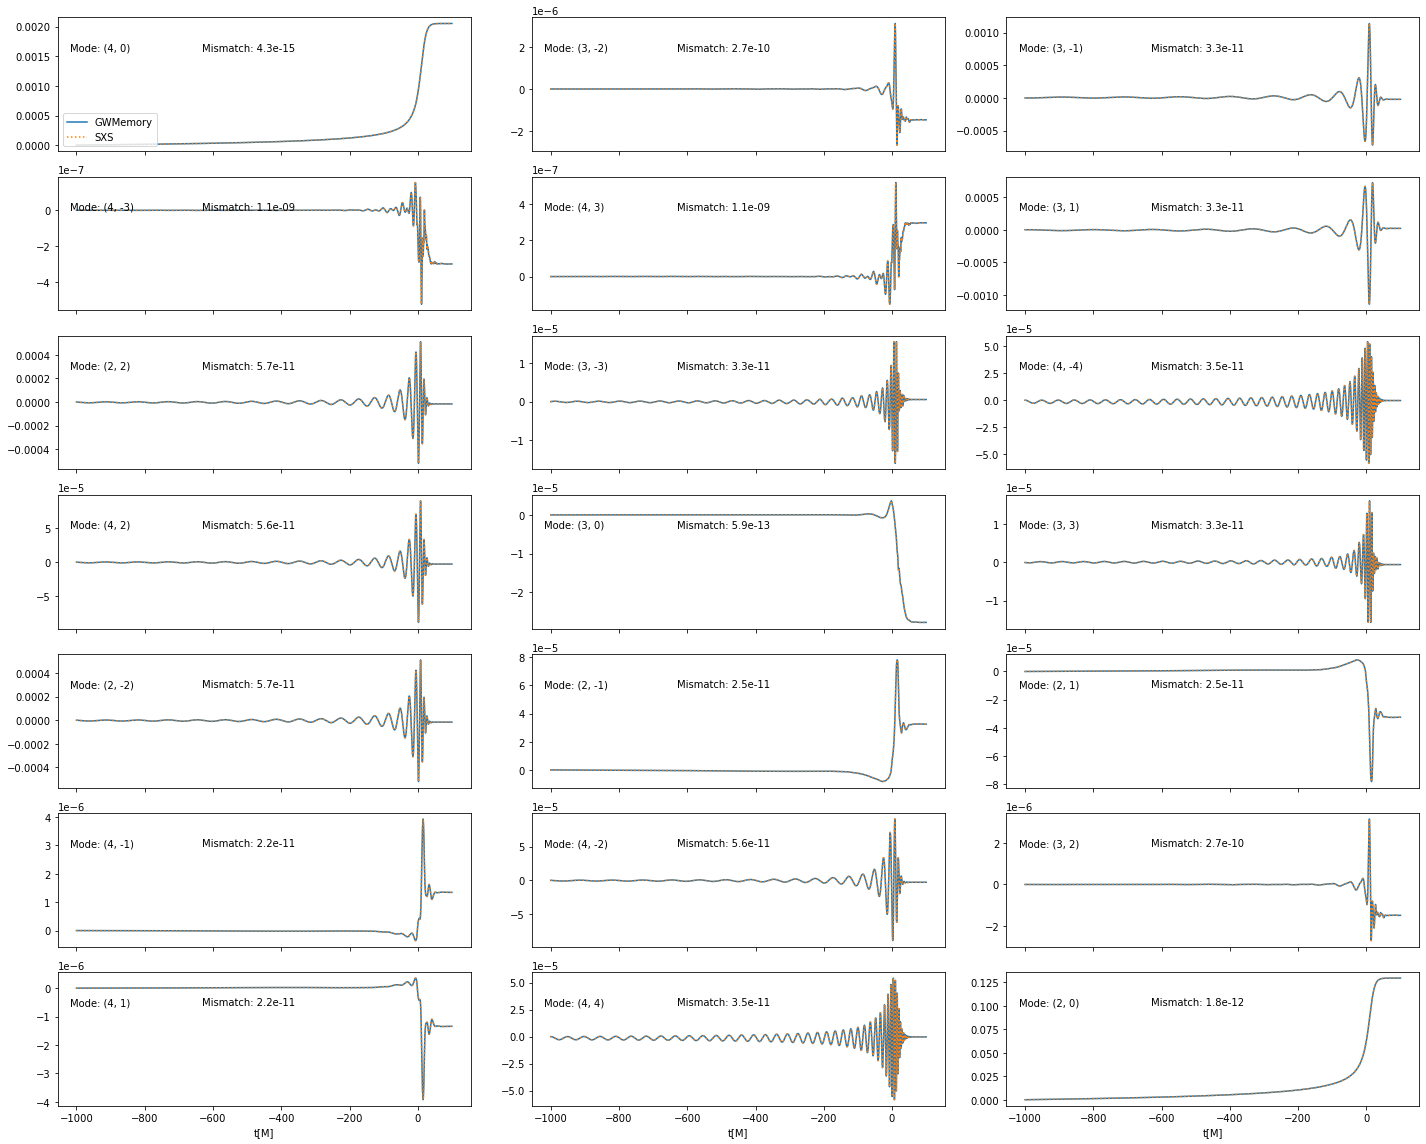

In [19]:
modes = set(h_mem.keys()).intersection(h_mem_sxs.keys())
fig, axes = subplots(nrows=7, ncols=3, sharex=True, figsize=(20, 16))
for ii, mode in enumerate(modes):
    gwmem = h_mem[mode]
    sxsmem = h_mem_sxs[mode]
    overlap = (
        np.vdot(gwmem, sxsmem)
        / np.vdot(gwmem, gwmem) ** 0.5
        / np.vdot(sxsmem, sxsmem) ** 0.5
    )

    ax = axes[ii // 3, ii % 3]
    ax.plot(times, gwmem.real, label="GWMemory")
    ax.plot(times_sxs, sxsmem.real, linestyle=":", label="SXS")
    ax.annotate(f"Mode: ({mode[0]}, {mode[1]})", (0.03, 0.75), xycoords="axes fraction")
    ax.annotate(
        f"Mismatch: {1 - overlap.real:.1e}", (0.35, 0.75), xycoords="axes fraction"
    )
axes[0, 0].legend(loc="lower left")
axes[-1, 0].set_xlabel("t[M]")
axes[-1, 1].set_xlabel("t[M]")
axes[-1, 2].set_xlabel("t[M]")
tight_layout()
     

Comparison for imaginary part of the strain

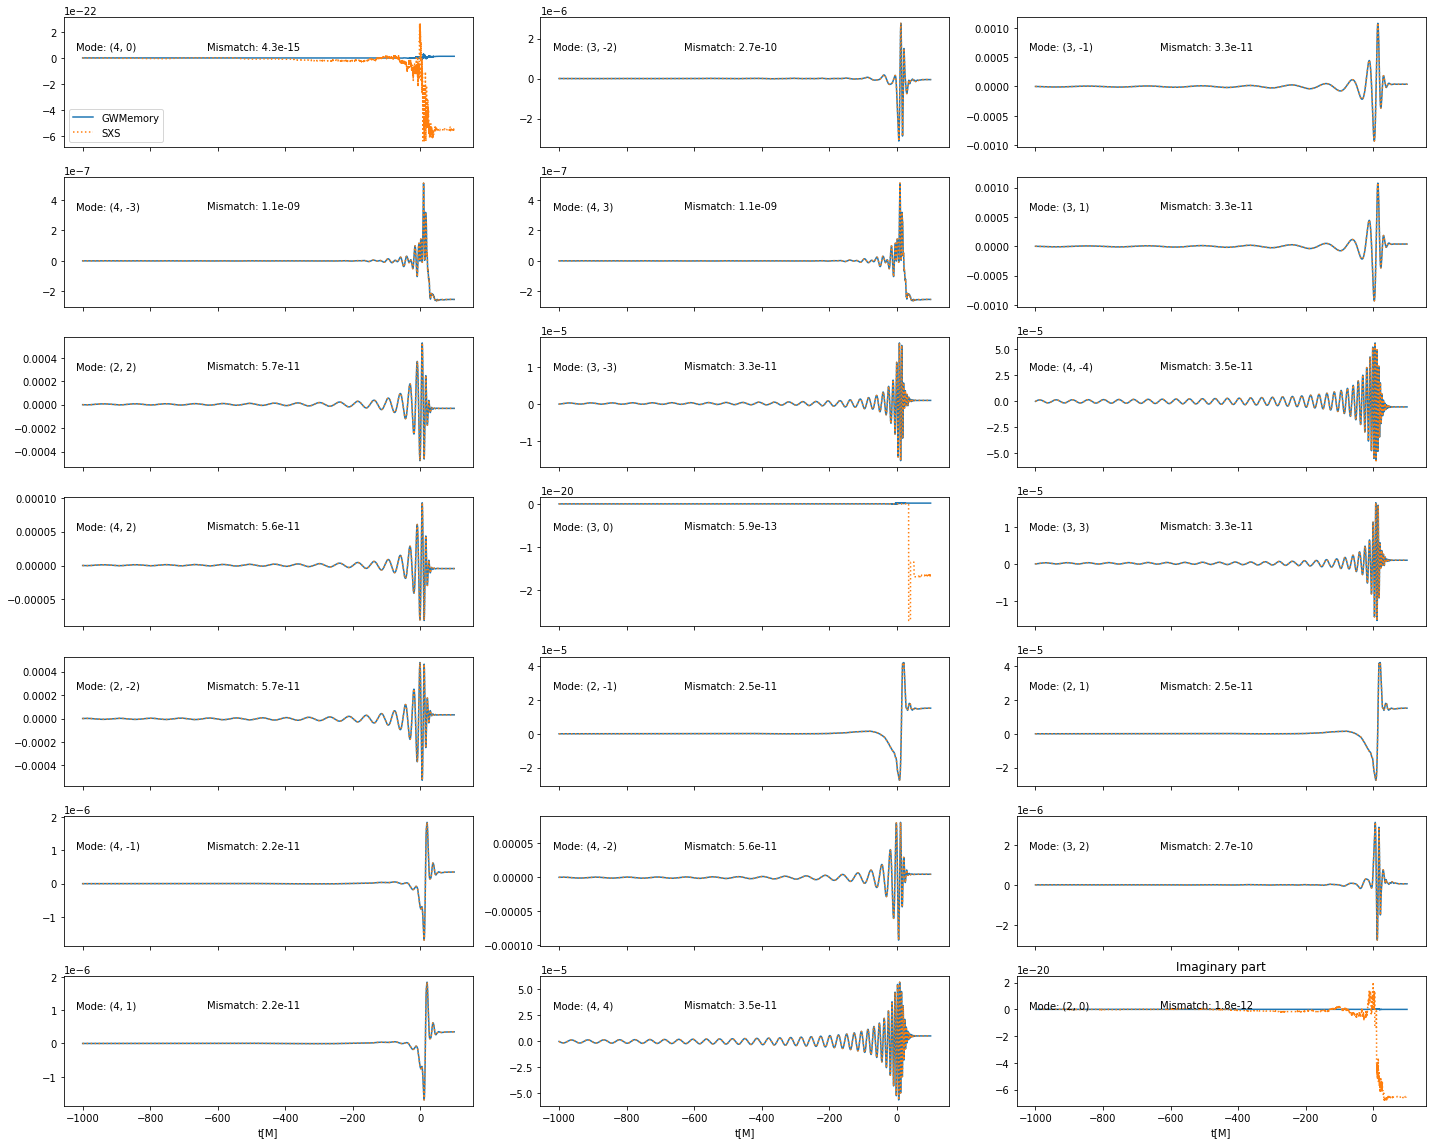

In [15]:
modes = set(h_mem.keys()).intersection(h_mem_sxs.keys())
fig, axes = subplots(nrows=7, ncols=3, sharex=True, figsize=(20, 16))
for ii, mode in enumerate(modes):
    gwmem = h_mem[mode]
    sxsmem = h_mem_sxs[mode]
    overlap = (
        np.vdot(gwmem, sxsmem)
        / np.vdot(gwmem, gwmem) ** 0.5
        / np.vdot(sxsmem, sxsmem) ** 0.5
    )

    ax = axes[ii // 3, ii % 3]
    ax.plot(times, gwmem.imag, label="GWMemory")
    ax.plot(times_sxs, sxsmem.imag, linestyle=":", label="SXS")
    ax.annotate(f"Mode: ({mode[0]}, {mode[1]})", (0.03, 0.75), xycoords="axes fraction")
    ax.annotate(
        f"Mismatch: {1 - overlap.real:.1e}", (0.35, 0.75), xycoords="axes fraction"
    )
axes[0, 0].legend(loc="lower left")
axes[-1, 0].set_xlabel("t[M]")
axes[-1, 1].set_xlabel("t[M]")
axes[-1, 2].set_xlabel("t[M]")
tight_layout()
     